In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import pdb
import matplotlib
from __future__ import division, print_function

from scipy.stats import gaussian_kde
import scipy.stats as st
import os
import pandas as pd
import seaborn as sns
import scipy.io as sio

In [2]:
def plot_result(data,title,range_limit,point=True,step=1,alpha=1.0):
    bbox=[range_limit[0],range_limit[1],range_limit[0],range_limit[1]]
    df = pd.DataFrame(data)  
    fig=plt.figure(figsize=[5,5])
    # g = sns.jointplot(x=0, y=1, data=df, kind="kde", cmap='Blues', ratio=1000, n_levels=30, kernel="biw" , bw="silverman" , stat_func=None,joint_kws={'shade_lowest':False}, xlim=range_limit, ylim=range_limit )

    g = sns.JointGrid(x=0, y=1, data=df,xlim=range_limit, ylim=range_limit )
    # g = sns.jointplot(x=0, y=1, data=df, kind="kde", ratio=1000, stat_func=None,joint_kws={'shade_lowest':False}, xlim=range_limit, ylim=range_limit )
    # g= sns.jointplot(x1, x2, kind="kde", sns.kdeplot, cmap='Blues', n_levels=50, kernel="biw", bw=None, ratio=10, stat_func=None, joint_kws={'shade_lowest':True})
    
    g.plot_joint(sns.kdeplot, cmap='Blues', n_levels=50, kernel="biw", bw="silverman", ratio=100, stat_func=None, joint_kws={'shade_lowest':True})
    
    if point:
        g.plot_joint(plt.scatter, c="grey", s=5, linewidth=1, marker="o",alpha=alpha)
    g.set_axis_labels("", "") 
    
    
    plt.yticks([])
    plt.xticks([])
    plt.savefig(title+'.pdf', bbox_inches='tight')
    # g.savefig(title+'.pdf', bbox_inches='tight')
    plt.show()
    # 
    
range_limit = [-5,5]

/opt/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/axisgrid.py:1832: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=silverman`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  func(x=self.x, y=self.y, **kwargs)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/axisgrid.py:1832: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'ratio', 'stat_func', 'joint_kws'
  cset = contour_func(


<Figure size 720x720 with 0 Axes>

<Figure size 500x500 with 0 Axes>

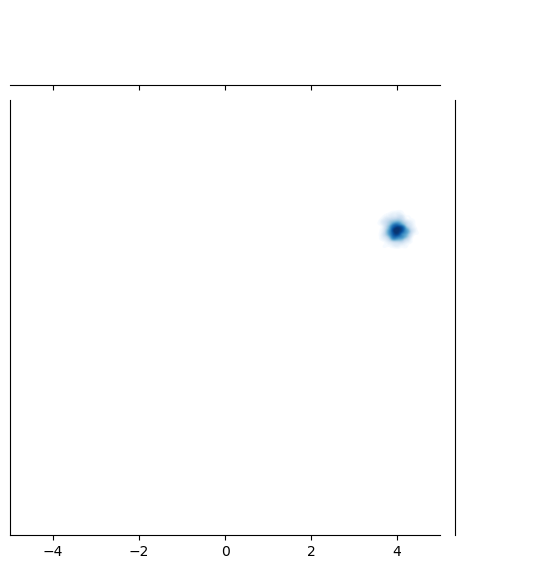

In [3]:
plt.figure(figsize=(6, 6), dpi=120)
plt.rcParams.update({
    "axes.labelsize": 12,
    "axes.titlesize": 14,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})


mat_contents = sio.loadmat('sgld.mat') 
dsgld = np.transpose( mat_contents['dsgld'] )
plot_result(dsgld,'dsgld',range_limit,point=False)

/opt/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/axisgrid.py:1832: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=silverman`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  func(x=self.x, y=self.y, **kwargs)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/axisgrid.py:1832: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'ratio', 'stat_func', 'joint_kws'
  cset = contour_func(


<Figure size 500x500 with 0 Axes>

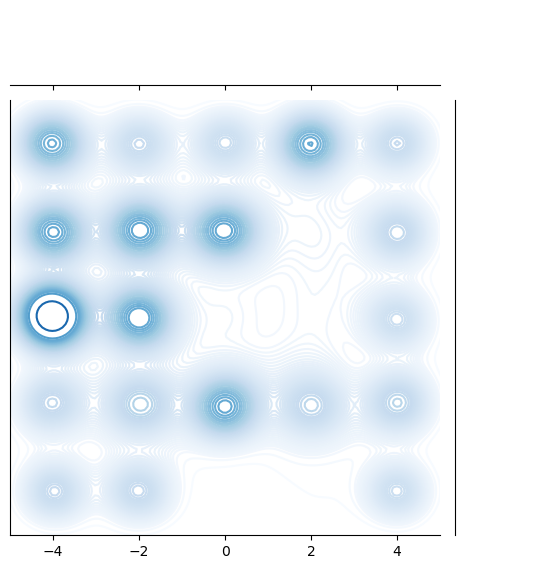

In [4]:
mat_contents = sio.loadmat('csgld.mat')
dcsgld = np.transpose( mat_contents['dcsgld'] )

plot_result(dcsgld,'dcsgld',range_limit,point=False)

In [5]:
num_mixtures = 5 * 5 

xs = np.linspace(-4, 4, 5)
ys = np.linspace(-4, 4, 5)
means_x = []
for a in xs:
    for b in ys:
        means_x.append([a,b])
        
# means_x = list([np.array([a,b]) for a,b in zip(xs,ys)])
std = np.sqrt(0.03)
u_mean=means_x
def gmm(x):
    for i in range(num_mixtures):
        d=st.multivariate_normal(u_mean[i],[[std,0.0],[0.0,std]])
        if i==0:
            ans=d.pdf(x)/num_mixtures
        else:
            ans+=d.pdf(x)/num_mixtures
    return ans

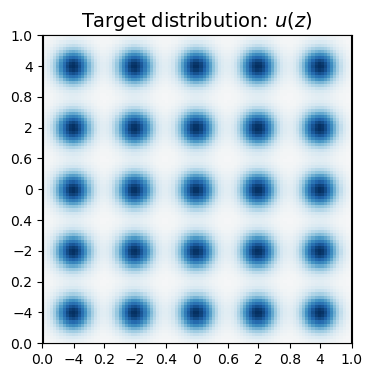

In [6]:
def evaluate_bivariate(range, npoints):
    """Evaluate (possibly unnormalized) pdf over a meshgrid."""
    side = np.linspace(range[0], range[1], npoints)
    z1, z2 = np.meshgrid(side, side)
    zv = np.hstack([z1.reshape(-1, 1), z2.reshape(-1, 1)])
    
    return z1, z2, zv

npoints_plot= 100
fig, _ = plt.subplots(figsize=(4, 4))

ax=plt.subplot(1,1,1, aspect='equal')
mesh_z1, mesh_z2, zv = evaluate_bivariate(range=range_limit, npoints=npoints_plot)

phat_z = gmm(zv)

phat_z=phat_z.reshape([npoints_plot,npoints_plot])
ax.pcolormesh(mesh_z1, mesh_z2, phat_z)
z_min, z_max = -np.abs(phat_z).max(), np.abs(phat_z).max()
plt.pcolor(mesh_z1, mesh_z2, phat_z, cmap='RdBu', vmin=z_min, vmax=z_max)
plt.xlim(range_limit); plt.ylim(range_limit); ax.set_title('Target distribution: $u(z)$')
fig.savefig('gmm_25.pdf', bbox_inches='tight')

In [7]:
phat_z_ = phat_z *1000

samples = []
for i in range(npoints_plot):
    for j in range(npoints_plot):
        nz = int(phat_z_[i,j])
        if nz > 0:
            z_ = np.tile([  mesh_z1[i,j] , mesh_z2[i,j]  ],(nz,1))
            samples.append(z_)

/opt/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/axisgrid.py:1832: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=silverman`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  func(x=self.x, y=self.y, **kwargs)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/axisgrid.py:1832: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'ratio', 'stat_func', 'joint_kws'
  cset = contour_func(


<Figure size 500x500 with 0 Axes>

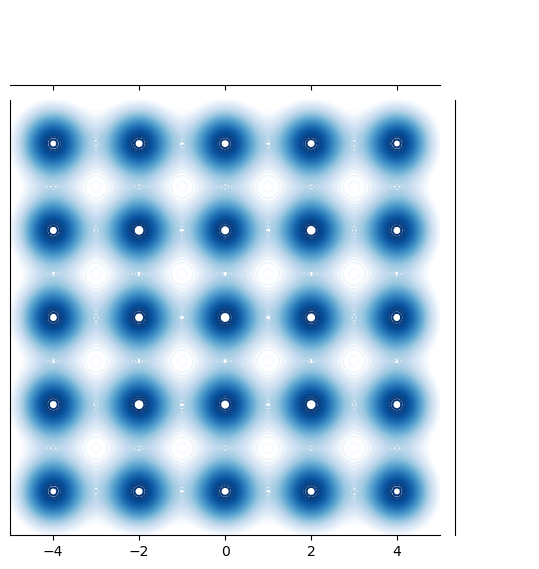

In [8]:
data = np.concatenate( samples, axis=0)
plot_result(data,'gt',range_limit,point=False)

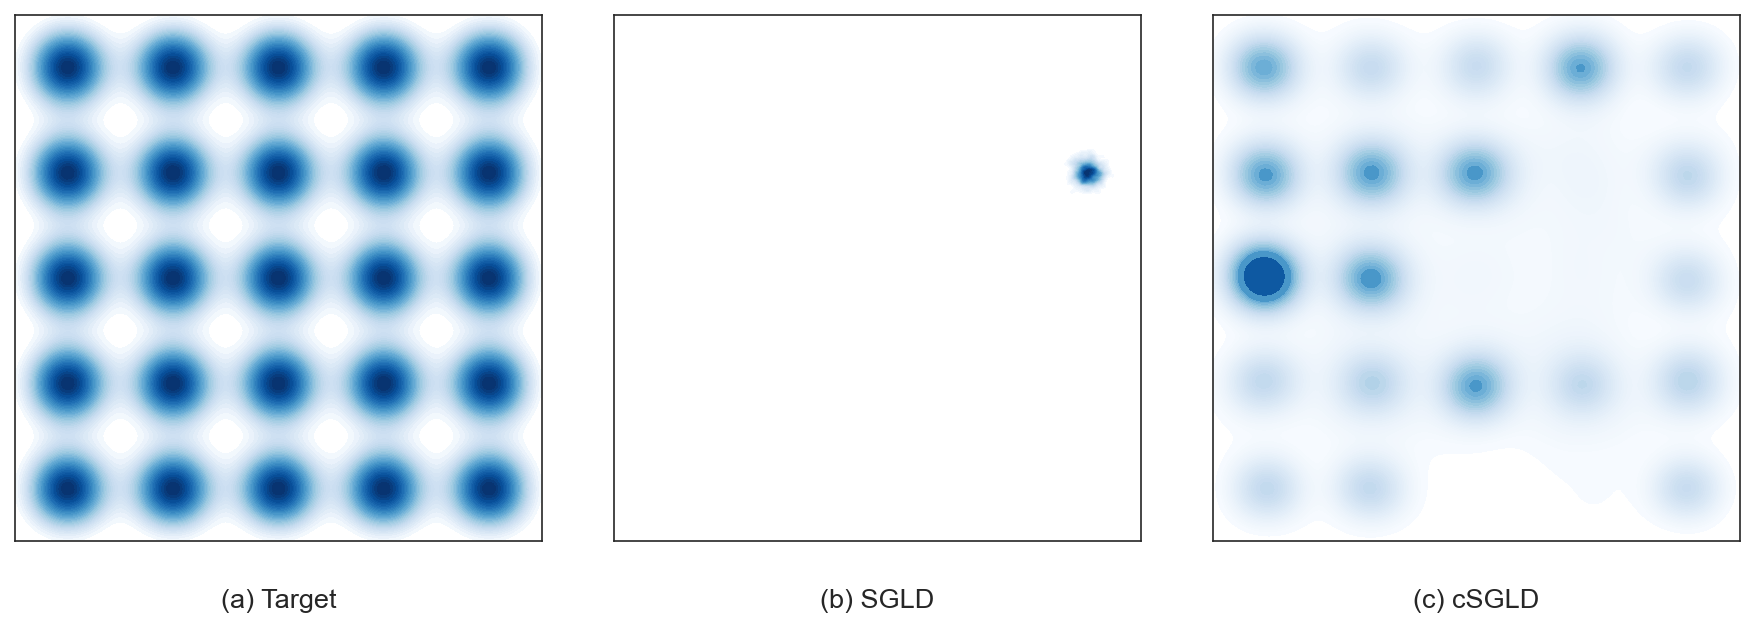

In [9]:
data = np.concatenate(samples, axis=0)  


sns.set_style("white")
plt.rcParams.update({"figure.dpi": 150, "axes.titlesize": 13,})

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)

datasets = [
    (data,  "(a) Target"),
    (dsgld, "(b) SGLD"),
    (dcsgld,"(c) cSGLD"),
]

for ax, (samples_, title) in zip(axes, datasets):
    sns.kdeplot(
        x=samples_[:, 0],
        y=samples_[:, 1],
        fill=True,
        levels=35,
        cmap="Blues",
        bw_adjust=0.8,
        thresh=0.05,
        ax=ax
    )
    
    ax.set_title(title, y=-0.15)
    ax.set_aspect("equal")
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout(w_pad=2)

plt.savefig("multiple_modes.png", dpi=300, bbox_inches="tight")

plt.show()